In [2]:
import cv2
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt


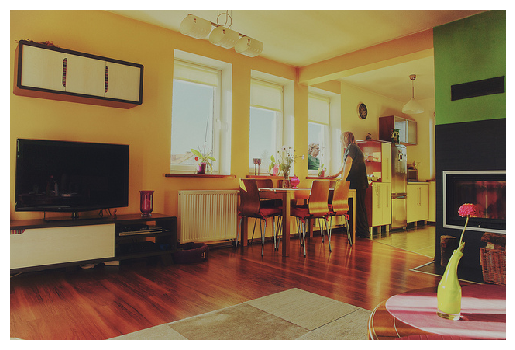

In [3]:
# Replace with your image directory path
image_dir = "C:/Users/megha/Downloads/instances_val2017.json-20241106T143109Z-001/instances_val2017.json"
image_path = os.path.join(image_dir, "C:/Users/megha/Downloads/000000000139.jpg")  # Use an actual image from your dataset

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for display

plt.imshow(image_rgb)
plt.axis('off')
plt.show()


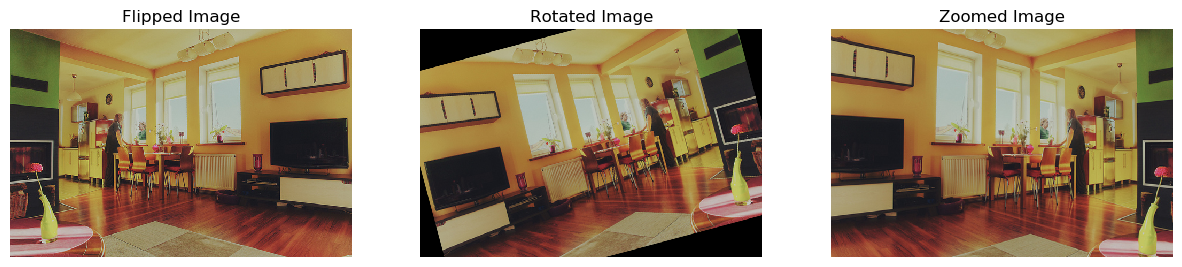

In [4]:
# Horizontal flip
flipped_image = cv2.flip(image, 1)

# Rotation
height, width = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle=15, scale=1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Zoom (cropping)
zoomed_image = image[30:height-30, 30:width-30]  # Crop 30 pixels from each edge
zoomed_image = cv2.resize(zoomed_image, (width, height))  # Resize back to original size

# Display augmented images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Flipped Image")
axs[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Rotated Image")
axs[2].imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
axs[2].set_title("Zoomed Image")
for ax in axs:
    ax.axis('off')
plt.show()


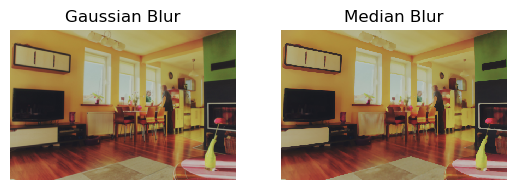

In [6]:
# Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Median Blur (useful for salt-and-pepper noise)
median_blur_image = cv2.medianBlur(image, 5)

# Display blurred images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_blur_image, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')
plt.show()


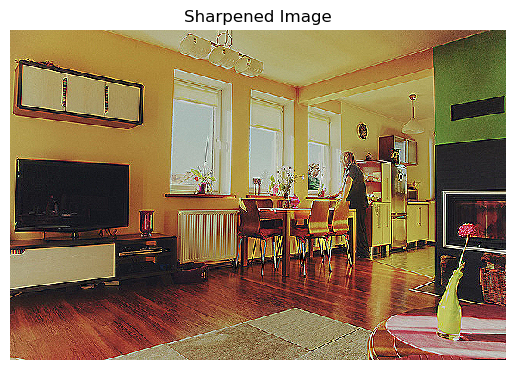

In [7]:
# Create a sharpening kernel
sharpening_kernel = np.array([[0, -1, 0], 
                              [-1, 5, -1], 
                              [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()


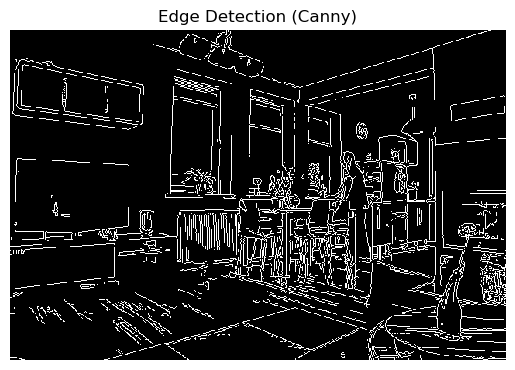

In [8]:
# Canny Edge Detection
edges = cv2.Canny(image, threshold1=100, threshold2=200)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')
plt.show()


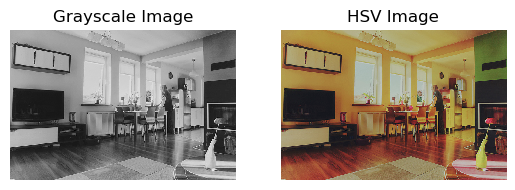

In [9]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display color space converted images
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.title("HSV Image")
plt.axis('off')
plt.show()


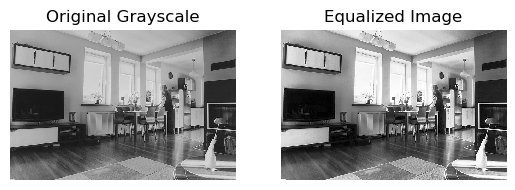

In [10]:
# Apply histogram equalization to grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()


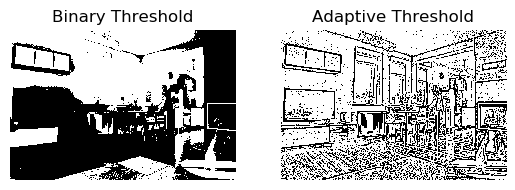

In [11]:
# Simple binary threshold
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Adaptive thresholding (useful for images with varying lighting)
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Display thresholded images
plt.subplot(1, 2, 1)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Threshold")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()


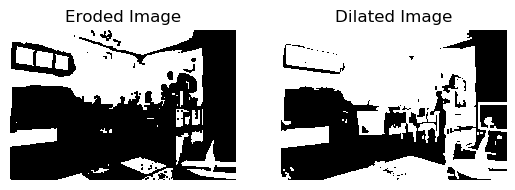

In [12]:
# Dilation and Erosion
kernel = np.ones((5, 5), np.uint8)

# Erosion (shrinks the object)
eroded_image = cv2.erode(binary_thresh, kernel, iterations=1)

# Dilation (expands the object)
dilated_image = cv2.dilate(binary_thresh, kernel, iterations=1)

# Display morphological operations
plt.subplot(1, 2, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')
plt.show()


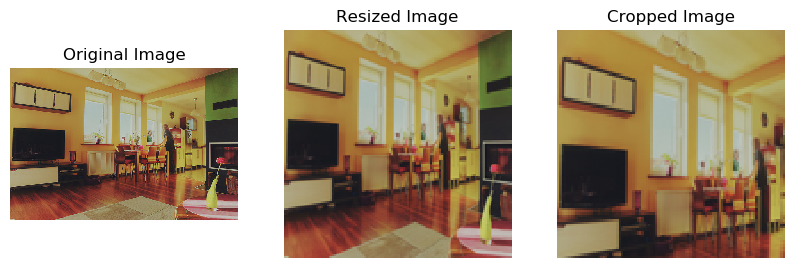

In [13]:
# Function to resize and crop images
def process_image(image_path, resize_size=(128, 128), crop_area=(0, 0, 100, 100)):
    with Image.open(image_path) as img:       
        resized_img = img.resize(resize_size)
        cropped_img = resized_img.crop(crop_area)
        return img, resized_img, cropped_img  # Return original, resized, and cropped images

# Example usage with your specified image path
image_path = "C:/Users/megha/Downloads/000000000139.jpg"
original_image, resized_image, cropped_image = process_image(image_path)

# Display the original, resized, and cropped images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Display resized image
plt.subplot(1, 3, 2)
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis('off')

# Display cropped image
plt.subplot(1, 3, 3)
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis('off')

# Show the plots
plt.show()


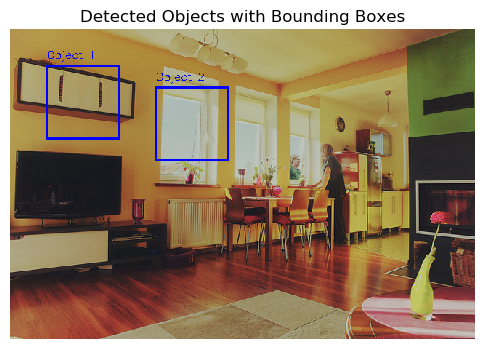

In [14]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Function to add bounding boxes on an image
def process_image(image_path, boxes=None, labels=None):
    # Open the image with PIL
    with Image.open(image_path) as img:
        # Convert the image to OpenCV format (BGR) for drawing
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # If bounding boxes and labels are provided, draw them
        if boxes and labels:
            for i, box in enumerate(boxes):
                x1, y1, x2, y2 = box
                cv2.rectangle(img_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
                cv2.putText(img_cv, labels[i], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

        # Convert back to PIL format for matplotlib display
        img_with_boxes = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        
        return img_with_boxes

# Manually defined bounding boxes and labels (example)
boxes = [(50, 50, 150, 150), (200, 80, 300, 180)]  # Example coordinates for bounding boxes
labels = ["Object 1", "Object 2"]

# Example usage with your specified image path
image_path = "C:/Users/megha/Downloads/000000000139.jpg"
detected_image = process_image(image_path, boxes=boxes, labels=labels)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(detected_image)
plt.title("Detected Objects with Bounding Boxes")
plt.axis('off')
plt.show()


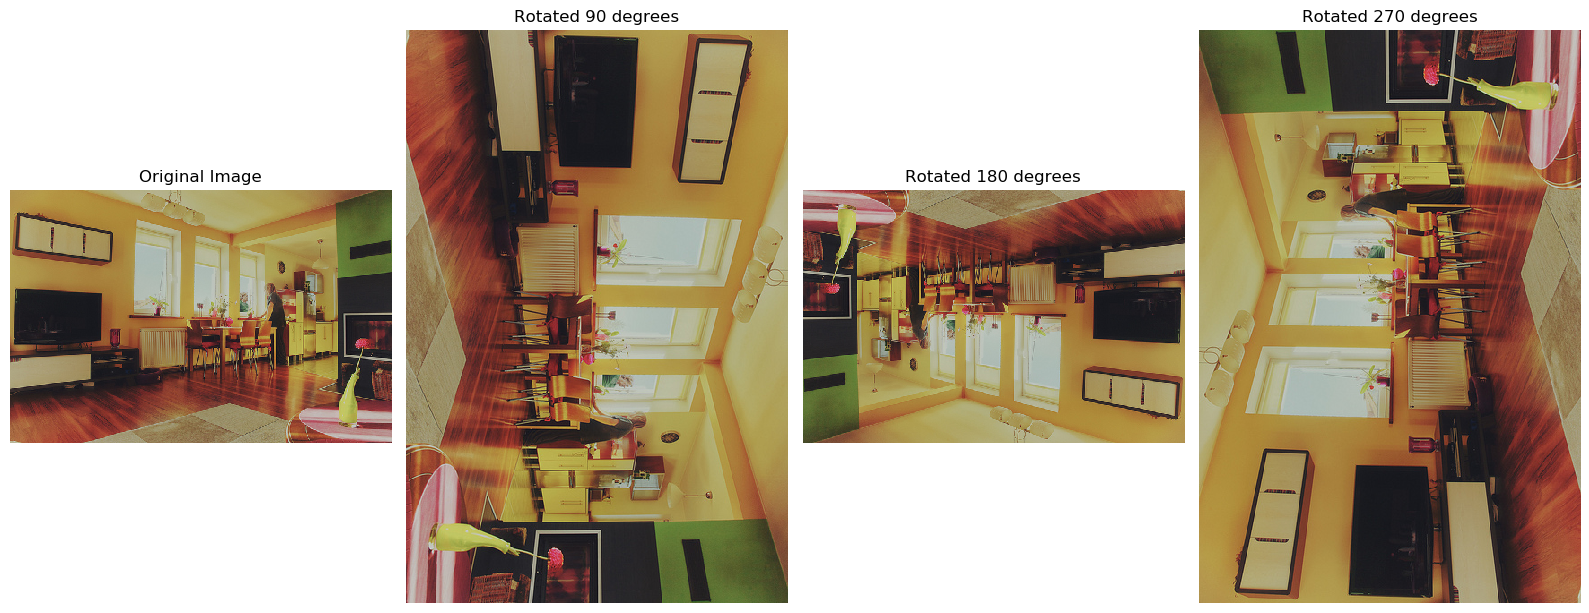

In [15]:
# Function to rotate images by 90, 180, and 270 degrees
def rotate_image(image_path):
    # Open the image using PIL and convert it to RGB format
    original_image = Image.open(image_path).convert("RGB")
    
    # Convert to OpenCV format (array) to apply rotations
    image_rgb = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)
    
    # Rotate the image
    rotated_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
    rotated_180 = cv2.rotate(image_rgb, cv2.ROTATE_180)
    rotated_270 = cv2.rotate(image_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    # Convert back to RGB for displaying with matplotlib
    rotated_90 = cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB)
    rotated_180 = cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB)
    rotated_270 = cv2.cvtColor(rotated_270, cv2.COLOR_BGR2RGB)
    
    # Return original and rotated images
    return original_image, rotated_90, rotated_180, rotated_270

# Example usage with your specified image path
image_path = "C:/Users/megha/Downloads/000000000139.jpg"
original_image, rotated_90, rotated_180, rotated_270 = rotate_image(image_path)

# Display the original and rotated images using matplotlib
plt.figure(figsize=(16, 8))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Display rotated 90 degrees
plt.subplot(1, 4, 2)
plt.imshow(rotated_90)
plt.title("Rotated 90 degrees")
plt.axis('off')

# Display rotated 180 degrees
plt.subplot(1, 4, 3)
plt.imshow(rotated_180)
plt.title("Rotated 180 degrees")
plt.axis('off')

# Display rotated 270 degrees
plt.subplot(1, 4, 4)
plt.imshow(rotated_270)
plt.title("Rotated 270 degrees")
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()
